In [1]:
import os
from googleapiclient.discovery import build as build_api_client

In [2]:
assert 'YOUTUBE_API_KEY' in os.environ
yt = build_api_client('youtube', 'v3', developerKey=os.environ['YOUTUBE_API_KEY'])

In [3]:
def load_categories(video_ids):
    request = yt.videos().list(
        part='snippet',
        id=','.join(video_ids)
    )
    response = request.execute()
    return {item['id']: item['snippet']['categoryId'] for item in response['items']}

In [5]:
import numpy as np
import tqdm.notebook
from loaders import load_semi_supervised

tqdm.notebook.tqdm()
df = load_semi_supervised()
df['api_category_id'] = -1

In [6]:
unknown_ids = df[df['dataset_category_id'].isnull()]['video_id']

print(len(unknown_ids))

def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

categories_dict = {}

videos_per_query = 20
for chunk in tqdm.tqdm(chunker(unknown_ids, videos_per_query), total=len(unknown_ids)/videos_per_query):
    video_ids = list(chunk)
    response = load_categories(video_ids)
    categories_dict.update(response)
    for vid, category in response.items():
        df.loc[df['video_id'] == vid, 'api_category_id'] = int(category)

  0%|          | 0/410.6 [00:00<?, ?it/s]

8212


100%|█████████▉| 410/410.6 [02:55<00:00,  2.56it/s]/home/mr/iti3/data-mining-project/.venv/lib/python3.6/site-packages/tqdm/std.py:484: TqdmWarning: clamping frac to range [0, 1]
  charset=Bar.ASCII if ascii is True else ascii or Bar.UTF)
100%|██████████| 411/410.6 [02:55<00:00,  2.34it/s]


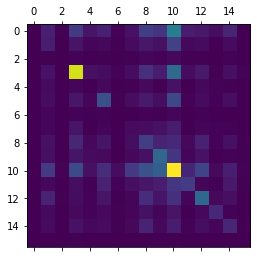

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(df['api_category_id'], df['predicted_category_id'])
plt.matshow(conf)

In [11]:
from sklearn.metrics import accuracy_score

accuracy(df['api_category_id'], df['predicted_category_id'])

ImportError: cannot import name 'accuracy'